There has been many different music trends throughout each year. Top songs, popular genres, and top artists change every year. We can look up top songs from 2010 to 2019 online, but we won't understand music trends of each year just by looking at song titles and artists. We can use Spotify to gather data on top songs of each year from 2010 to 2019. Spotify is a popular music streaming app that allows people to listen to most of the music that gets released in the world. 

In this tutorial, we will use computational analysis and data science techniques to analyze the components of top songs throughout the years. We will be looking at a song's dancibility, valence, energy, acoustic, and more to find correlations between the top songs. Using data science protocols and analysis, we aim to leave the audience with a better understanding of music trends throughout the years.

First, we import the essential libraries, which includes pandas to hold the dataframe, as well as numpy, matplotlib, and seaborn for numerical and statistical analysis used later. We also filter any warnings that can be potentially created through deprecated functions that these libraries implicitly call. 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

One convenience of this dataset was that it was already available in Kaggle, which means that we did not have to scrape it from a website. However, one oddity of this dataset is that it is not encoded using the standard UTF-8 style, which is done with most csv datasets, but rather in the cp1252 form, which is more popular for Windows. Therefore, that particular argument is neccesary in order to remove any potential errors and properly visualize the data.

In [133]:
data = pd.read_csv("top10s.csv", encoding='cp1252')
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Along with the basic information of the title, artist, genre, and year released of each song, there are also several other numerical factors of these songs that spotify assigns. These include:
* beats per minute (bpm) - as the name suggests, how fast is the song
* energy level (nrgy) - how energetic the song is
* danceability (dnce) - measured based on the tempo, rhythm, and beat strength; the higher this value is, the easier it is to dance to this song
* loudness (dB) - measured in decibals; again, the higher the value, the louder the song
* liveness (live) - the higher the value, the more likely the song is a live recording
* valence (val) - the musical positivitiness, the higher this value is, the happier the track is
* duration (dur) - measured in seconds, how long the song is 
* acoustic (acous) - higher the value, the more acoustic the track is
* speechiness (spch) - detects the presence of speech in a track; high the value, the more speech
* popularity (pop) - how popular the song is 

However, one strange column in this dataset appears to be the second one, called "Unnamed : 0". We know that this corresponds to the rank of the song on Spotify for the year it was released, so let's change the column name, done below. 

In [134]:
data = data.rename(columns = {'Unnamed: 0' : 'rank'})
data.head(20)

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


Let's extract quantitatively exactly how many songs, artists, and genres exist within the dataset. 

In [135]:
number_songs=data.title.nunique()
number_artists=data.artist.nunique()
number_genres=data['top genre'].nunique()
print('number_songs =', number_songs)
print('number_artists =', number_artists)
print('number_genres =', number_genres)
number_songs = 584
number_artists = 184
number_genres = 50

number_songs = 584
number_artists = 184
number_genres = 50


It appears that this dataset has different amounts of songs per year, with 2013 especially being abundant in the quantity of songs. We want to change the rank so that it corresponds to the year, rather than it just being the number of the row. A sample of this data, which is between the years 2013 and 2014, is shown below.

In [136]:
year = 2010
counter = 1
for index, row in data.iterrows():
    row = row.copy()
    if row['year'] != year:
        counter = 1
        year = row['year']
    data.loc[index, 'rank'] = counter
    counter += 1

data[200:230]

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
200,62,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50
201,63,Crazy Kids (feat. will.i.am),Kesha,dance pop,2013,128,75,72,-4,13,50,229,4,4,46
202,64,"Ooh La La (from ""The Smurfs 2"")",Britney Spears,dance pop,2013,128,57,69,-5,11,73,257,2,5,45
203,65,People Like Us,Kelly Clarkson,dance pop,2013,128,79,60,-5,36,61,259,4,4,45
204,66,Overdose,Ciara,dance pop,2013,107,70,77,-6,6,79,227,1,3,43
205,67,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,130,74,53,-6,24,45,186,0,4,42
206,68,Give It 2 U,Robin Thicke,dance pop,2013,127,83,67,-4,16,58,230,10,7,41
207,69,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36
208,70,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,95,84,71,-4,21,66,207,16,3,35
209,71,Freak,Kelly Rowland,atl hip hop,2013,104,78,65,-5,12,45,274,13,6,28


# Exploratory Data Analysis
We want to analyze this data from very different perspectives. Our first perspective is how do these attributes for the top songs per year change over time? And also, how distributed are they among the central statistic (the mean or median)? In addition, we want to look at the common features that the highest subset of this data has, meaning the top 5's for each year, and particularly the most common genre. 

In [3]:
cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

for var in cols:
    sns.violinplot(x = 'year', y = var, data = data)
    plt.show()

NameError: name 'sns' is not defined

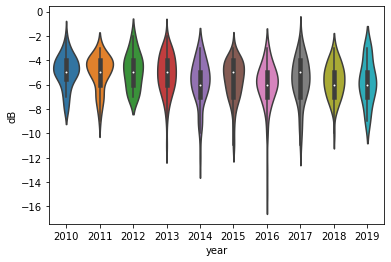

In [153]:
ax = sns.violinplot(x = 'year', y = 'dB', data = data.drop(data[data.year == 2016].dB.idxmin()))

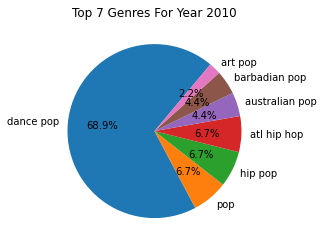

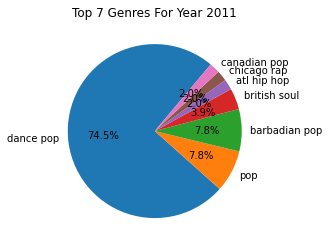

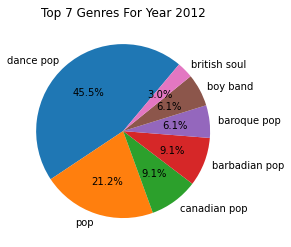

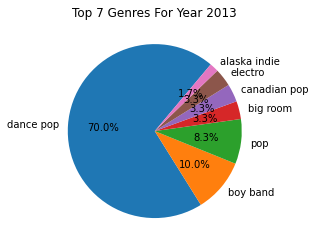

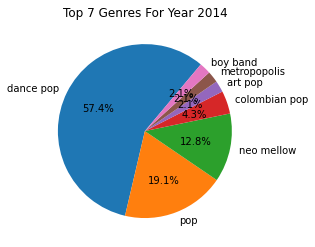

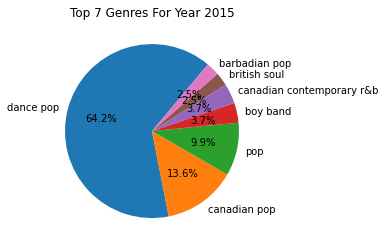

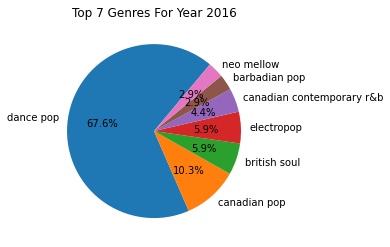

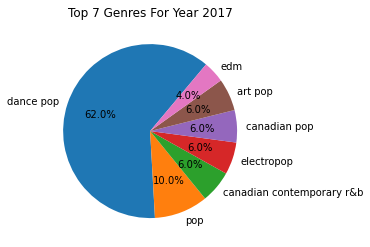

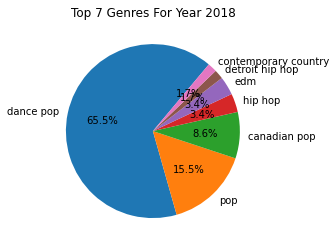

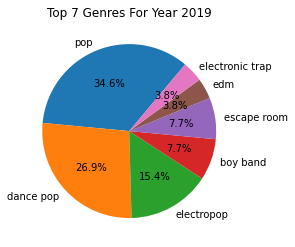

In [154]:
for x in range(2010, 2020):
    data2 = data[data['year'] == x]
    plt.pie(data2['top genre'].value_counts().iloc[:7],labels=data2['top genre'].value_counts().iloc[:7].index,
    autopct='%1.1f%%', shadow=False, startangle=50)
    plt.title('Top 7 Genres For Year ' + str(x))
    plt.show()